In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [2]:
quotations = pd.read_csv("../quotations231001.csv").drop(columns='sys_cooler')
print('len:', len(quotations))
quotations.head()

len: 1080


,cpu,mainboard,ram,gpu,case,power,cooler,ssd
0,18640280.0,18652877.0,16443341.0,27613427.0,21583046.0,19813847.0,21550985.0,12338942.0
1,18039569.0,18652877.0,18700841.0,18021914.0,18419840.0,19023932.0,NaN,13538642.0
2,19627808.0,18021440.0,18911780.0,18668606.0,12969350.0,21206702.0,18714860.0,17454683.0
3,19174175.0,21628184.0,18911780.0,21629063.0,NaN,19814027.0,NaN,17001050.0
4,17913710.0,18021491.0,18911780.0,18303401.0,16571885.0,18442058.0,18076145.0,16587443.0


In [3]:
cpus = quotations.cpu

In [4]:
cpu_df = pd.read_csv("../part_cpu_wb230922.csv")
mainboard_df = pd.read_csv("../part_mainboard230926.csv")
ram_df = pd.read_csv("../part_ram230921.csv")
gpu_df = pd.read_csv("../part_gpu_wb230921.csv")
case_df = pd.read_csv("../part_case230920.csv")
power_df = pd.read_csv("../part_power230920.csv")
cooler_df = pd.read_csv("../part_cooler230920.csv")
ssd_df = pd.read_csv("../part_ssd230926.csv")

In [5]:
mcb = max(cpu_df['bench_mark'])
mgb = max(gpu_df['bench_mark'])
mrc = max(ram_df['capacity'])
mncb = min(cpu_df['bench_mark'])
mngb = min(gpu_df['bench_mark'])
mnrc = min(ram_df['capacity'])

In [68]:
prices_r = dict({'cpu': [], 'gpu': [], 'ram': [], 'total': []})
prices = dict({'cpu': [], 'gpu': [], 'ram': [], 'total': []})
pseqs = dict({'cpu': [], 'gpu': [], 'ram': []})
# bench_r = dict({'cpu': [], 'gpu': [], 'ram': []})
bench_r = dict({'cpu': [], 'gpu': [], 'ram': [], 'total': []})
bench_rr = dict({'cpu': [], 'gpu': [], 'ram': [], 'total': []})

for row in quotations.values:
    try:
        cpu_price = cpu_df.loc[cpu_df['product_seq'] == row[0], 'price'].iloc[0]
        ram_price = ram_df.loc[ram_df['product_seq'] == row[2], 'price'].iloc[0]
        gpu_price = gpu_df.loc[gpu_df['product_seq'] == row[3], 'price'].iloc[0]
        
        cpu_bench = cpu_df.loc[cpu_df['product_seq'] == row[0], 'bench_mark'].iloc[0]
        ram_capa = ram_df.loc[ram_df['product_seq'] == row[2], 'capacity'].iloc[0]
        gpu_bench = gpu_df.loc[gpu_df['product_seq'] == row[3], 'bench_mark'].iloc[0]

        others = []
        others.append(mainboard_df.loc[mainboard_df['product_seq'] == row[1], 'price'])
        others.append(case_df.loc[case_df['product_seq'] == row[4], 'price'])
        others.append(power_df.loc[power_df['product_seq'] == row[5], 'price'])
        others.append(cooler_df.loc[cooler_df['product_seq'] == row[6], 'price'])
        others.append(ssd_df.loc[ssd_df['product_seq'] == row[7], 'price'])
        
        total = cpu_price+gpu_price+ram_price
        for o in others:
            if not o.empty: total += o.iloc[0]
        if np.isnan(total) or np.isnan(gpu_price) or np.isnan(ram_price): continue
        prices_r['cpu'].append(cpu_price / total)
        prices_r['gpu'].append(gpu_price / total)
        prices_r['ram'].append(ram_price / total)
        prices_r['total'].append(np.log(total / 10000000))
        
        bench_r['cpu'].append(np.log((cpu_bench - mncb) / (mcb - mncb) + 1))
        bench_r['gpu'].append(np.log((gpu_bench - mngb) / (mgb - mngb) + 1))
        bench_r['ram'].append(np.log((ram_capa - mnrc) / (mrc - mnrc) + 1))
        bench_r['total'].append(np.log(total / 10000000 + 2))
        
        clog = np.log((cpu_bench - mncb) / (mcb - mncb) + 1)
        glog = np.log((gpu_bench - mngb) / (mgb - mngb) + 1)
        rlog = np.log((ram_capa - mnrc) / (mrc - mnrc) + 1)
        tlog = np.log(total / 10000000 + 2)
        total_log = clog + glog + rlog
        bench_rr['cpu'].append(clog / total_log)
        bench_rr['gpu'].append(glog / total_log)
        bench_rr['ram'].append(rlog / total_log)
        bench_rr['total'].append(tlog / total_log)
        
        prices['cpu'].append(cpu_price)
        prices['gpu'].append(gpu_price)
        prices['ram'].append(ram_price)
        prices['total'].append(total)
        
        pseqs['cpu'].append(cpu_df.loc[cpu_df['product_seq'] == row[0], 'product_seq'].iloc[0])
        pseqs['gpu'].append(gpu_df.loc[gpu_df['product_seq'] == row[2], 'product_seq'].iloc[0])
        pseqs['ram'].append(ram_df.loc[ram_df['product_seq'] == row[3], 'product_seq'].iloc[0])
        
    except Exception as e:
        continue

In [88]:
bench_rr['total']

[0.9192716025620347,
 0.6648572373381448,
 0.821717269629278,
 0.7439518293795339,
 0.7934082761469823,
 0.8298547538151912,
 0.824302496678617,
 0.7885683747070568,
 0.7844308956527213,
 0.8261187507204691,
 0.8874995363291522,
 0.902401982329115,
 1.0858901910774414,
 0.6695084468983645,
 0.7683012799941402,
 0.70573641302637,
 0.7601996159813282,
 0.8905867199779862,
 0.8776210109577667,
 0.6970390437138417,
 0.9724808735315771,
 0.805370024732964,
 0.7394767032737941,
 0.7264345040554491,
 0.7874404700947771,
 0.7855345114462441,
 0.8061325140219314,
 1.0225758714745008,
 1.053973774086711,
 0.7702601383979755,
 0.8229603257235772,
 0.8174942424441516,
 0.9735400887649605,
 0.9697054043965574,
 0.973063774813296,
 0.5746813326091289,
 0.6905214537177565,
 0.8817866178753471,
 0.7708262829816578,
 0.7666521200309743,
 0.9661474714284406,
 0.6381707068948748,
 0.7407237751252546,
 0.8863871280439564,
 1.055677775790301,
 0.9926753813043139,
 0.9690235973743649,
 0.8504801701238849,
 

In [7]:
for key in prices_r.keys():
    print(len(prices_r[key]))
    print(len(prices[key]))
print(len(prices['total']))

680
680
680
680
680
680
680
680
680


In [8]:
minc = min(prices['cpu'])
maxc = max(prices['cpu'])
ming = min(prices['gpu'])
maxg = max(prices['gpu'])
minr = min(prices['ram'])
maxr = max(prices['ram'])
mint = min(prices['total'])
maxt = max(prices['total'])

In [9]:
cpn = [(x - minc) / (maxc - minc) for x in prices['cpu']]
gpn = [(x - ming) / (maxg - ming) for x in prices['gpu']]
rpn = [(x - minr) / (maxr - minr) for x in prices['ram']]
tpn = [(x - mint) / (maxt - mint) for x in prices['total']]

In [10]:
for t in prices['cpu']:
    if np.isnan(t):
        print(t)

In [11]:
pdata = np.array([cpn, gpn, rpn, tpn]).T

In [12]:
price_rate = np.array(pd.DataFrame(prices_r))

In [13]:
k = 10
model = KMeans(n_clusters=k, n_init='auto')

### CPU, GPU, RAM, 총 가격 수준이 비슷한 견적들끼리 묶는다.
- 군집화(Clustering)에 K-Means 알고리즘을 사용함

In [14]:
model.fit(pdata)

C:\Users\SSAFY\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=10, n_init='auto')

In [15]:
res = model.predict(pdata)

# 1. 총 견적 가격(y축)에서 CPU가 차지하는 비율(x축)
- 전체적으로 총 견적 가격이 높을수록 CPU의 가격이 차지하는 비율은 낮아짐
- 그룹1 (파랑): 일반적인 용도 (사무 등)
- 그룹2 (노랑): 중간 사양
- 그룹3 (초록): 고사양
- 그룹4 (빨강): 고사양(게임)

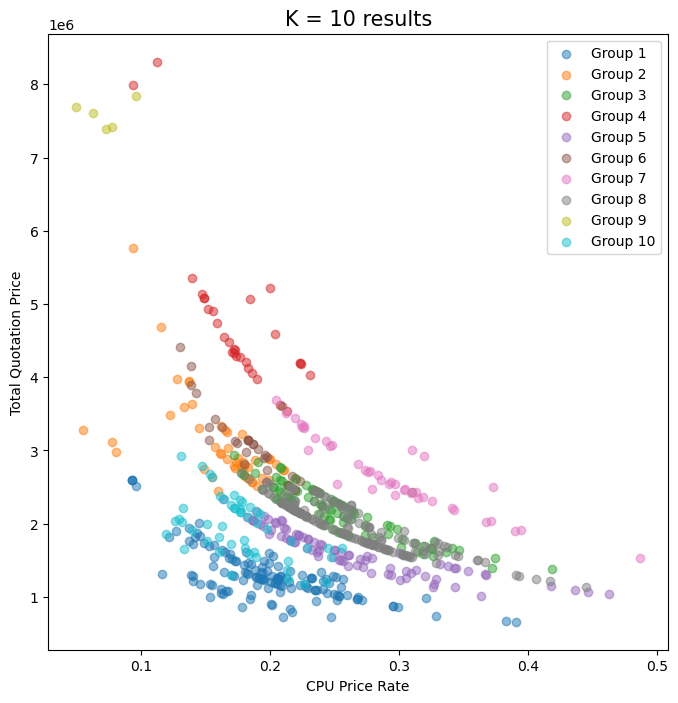

In [16]:
plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(price_rate[res == i, 0], pdata[res == i, 3] * (maxt - mint) + mint, alpha=0.5, label=f'Group {i+1}')

plt.title('K = %d results'%k , size = 15)
plt.legend()
plt.xlabel('CPU Price Rate')
plt.ylabel('Total Quotation Price')
plt.show()

In [17]:
for i in range(k):
    total_avg = np.average(np.array(prices['total'])[res == i])
    print(f'Group{i+1} Average Total Price: {total_avg:.0f}')

Group1 Average Total Price: 1287919
Group2 Average Total Price: 3075963
Group3 Average Total Price: 2179123
Group4 Average Total Price: 4718548
Group5 Average Total Price: 1609671
Group6 Average Total Price: 3094665
Group7 Average Total Price: 2675549
Group8 Average Total Price: 1961809
Group9 Average Total Price: 7591699
Group10 Average Total Price: 1949272


In [18]:
for i in range(k):
    cpu_bench = 0
    for cseq in np.array(pseqs['cpu'])[res == i]:
        cpu_bench += cpu_df.loc[cpu_df['product_seq'] == cseq, 'bench_mark'].iloc[0]
    group_len = len(np.array(pseqs['cpu'])[res == i])
    print(f'Group{i+1} Average Bench: {cpu_bench/group_len:.0f}')

Group1 Average Bench: 25822
Group2 Average Bench: 40118
Group3 Average Bench: 43193
Group4 Average Bench: 59463
Group5 Average Bench: 37276
Group6 Average Bench: 43463
Group7 Average Bench: 57520
Group8 Average Bench: 41651
Group9 Average Bench: 43963
Group10 Average Bench: 33023


In [19]:
lst = []
for i in range(k):
    cpu_price = 0
    for cseq in np.array(pseqs['cpu'])[res == i]:
        cpu_price += cpu_df.loc[cpu_df['product_seq'] == cseq, 'price'].iloc[0]
    group_len = len(np.array(pseqs['cpu'])[res == i])
    lst.append(cpu_price/group_len)
    print(f'Group{i+1} Average Price: {cpu_price/group_len:.0f}')

Group1 Average Price: 246025
Group2 Average Price: 487875
Group3 Average Price: 531955
Group4 Average Price: 804541
Group5 Average Price: 408234
Group6 Average Price: 565558
Group7 Average Price: 757765
Group8 Average Price: 506773
Group9 Average Price: 546360
Group10 Average Price: 339306


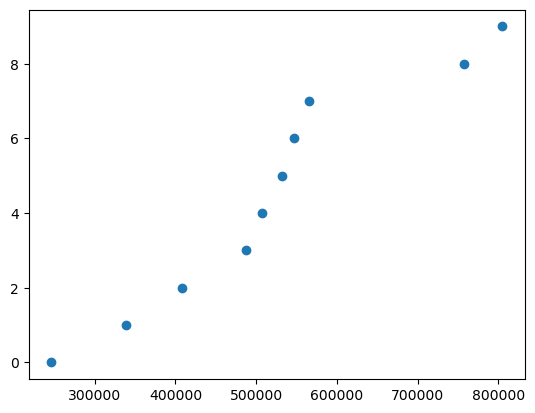

In [20]:
plt.scatter(np.sort(lst), range(len(lst)))
plt.show()

In [21]:
for i in range(k):
    cpu_rate = np.average(price_rate[res == i, 0]) * 100
    gpu_rate = np.average(price_rate[res == i, 1]) * 100
    ram_rate = np.average(price_rate[res == i, 2]) * 100
    print(f'Group{i+1} Average Rate: {cpu_rate:2.0f}%: {gpu_rate:2.0f}%: {ram_rate:1.0f}%: {np.sum([cpu_rate, gpu_rate, ram_rate]):2.0f}%')

Group1 Average Rate: 20%: 49%: 4%: 73%
Group2 Average Rate: 16%: 57%: 2%: 75%
Group3 Average Rate: 25%: 43%: 7%: 75%
Group4 Average Rate: 18%: 53%: 3%: 74%
Group5 Average Rate: 26%: 44%: 3%: 74%
Group6 Average Rate: 19%: 50%: 7%: 75%
Group7 Average Rate: 29%: 43%: 3%: 75%
Group8 Average Rate: 27%: 45%: 3%: 75%
Group9 Average Rate:  7%: 83%: 2%: 92%
Group10 Average Rate: 18%: 49%: 8%: 75%


# 2. 총 견적 가격(y축)에서 GPU가 차지하는 비율(x축)
- 전체적으로 총 견적 가격이 높을수록 GPU의 가격이 차지하는 비율은 높아짐
- 그룹1 (파랑)

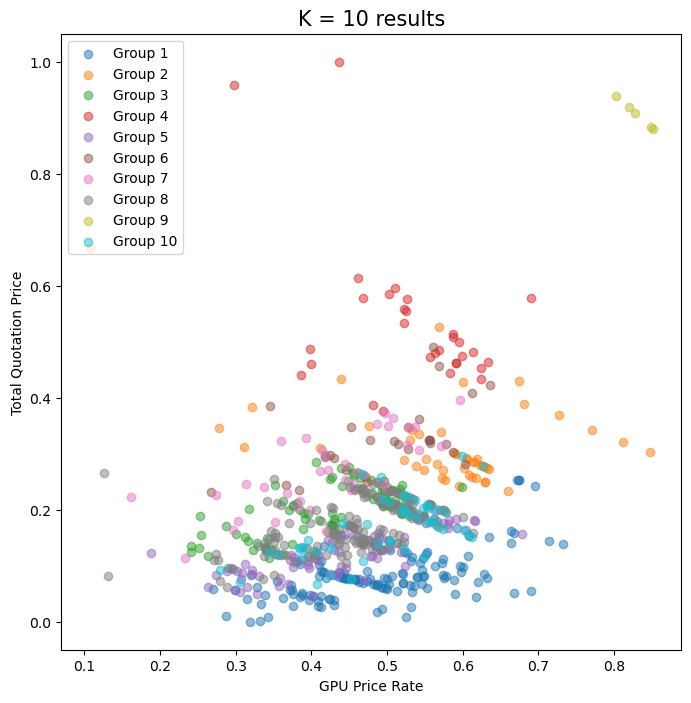

In [22]:
plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(price_rate[res == i, 1], pdata[res == i, 3], alpha=0.5, label=f'Group {i+1}')

plt.title('K = %d results'%k , size = 15)
plt.legend()
plt.xlabel('GPU Price Rate')
plt.ylabel('Total Quotation Price')
plt.show()

# 3. 총 견적 가격(y축)에서 RAM이 차지하는 비율(x축)
- 전체적으로 총 견적 가격이 높을수록 RAM의 가격이 차지하는 비율은 낮아짐
- 그룹1 (파랑)

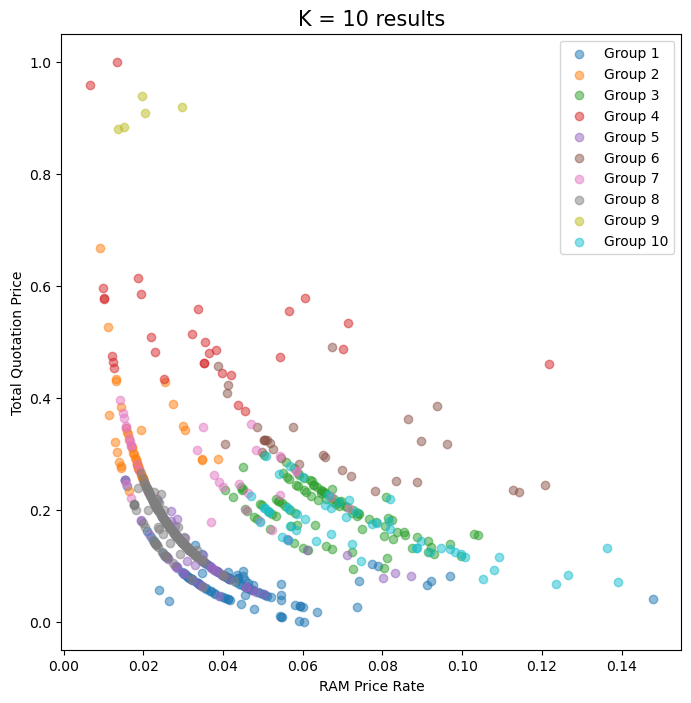

In [23]:
plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(price_rate[res == i, 2], pdata[res == i, 3], alpha=0.5, label=f'Group {i+1}')

plt.title('K = %d results'%k , size = 15)
plt.legend()
plt.xlabel('RAM Price Rate')
plt.ylabel('Total Quotation Price')
plt.show()

# 프로그램 사양 분석

In [24]:
gp = pd.read_csv('../gameprograms230921.csv')
ep = pd.read_csv('../etc_programs_utf.csv')
gr = pd.read_csv(f'../gamerequirements230926.csv')
er = pd.read_csv(f'../etc_requirements231002.csv')

In [25]:
programs = pd.concat([gp, ep], ignore_index=True)
reqs = pd.concat([gr, er], ignore_index=True)

In [26]:
headers = programs.usage.unique()
avg_cpu_bench = [0] * len(headers)
avg_gpu_bench = [0] * len(headers)
avg_ram_capa = [0] * len(headers)
total_counts = []

for usage in headers:
    programs_usage = reqs[reqs['program_id'].isin(programs.loc[programs.usage == usage].index)]
    
    cpu_bench = 0
    gpu_bench = 0
    ram_capa = 0
    total = len(programs_usage)
    
    for cid in programs_usage.cpu_id:
        cpu_bench += cpu_df.loc[cid-1, 'bench_mark']
    
    for gid in programs_usage.gpu_id:
        if np.isnan(gid): continue
        gpu_bench += gpu_df.loc[gid-1, 'bench_mark']
        
    for rc in programs_usage.ram:
        if np.isnan(rc): continue
        ram_capa += rc
        
    avg_cpu_bench[np.where(headers == usage)[0][0]] = cpu_bench / total
    avg_gpu_bench[np.where(headers == usage)[0][0]] = gpu_bench / total
    avg_ram_capa[np.where(headers == usage)[0][0]] = ram_capa / total
    total_counts.append(total)

print('  CPU |   GPU |  RAM |')
print('----------------------')
for h, acb, agb, arc, tt in zip(headers, avg_cpu_bench, avg_gpu_bench, avg_ram_capa, total_counts):
    print(f'{acb:5.0f} | {agb:5.0f} | {arc:4.1f} | {h} ({tt}개)')

  CPU |   GPU |  RAM |
----------------------
 3109 |  2968 |  5.4 | 게임 (12094개)
 5852 |  1332 |  3.8 | 사무 (6개)
 4874 |     0 |  5.8 | 개발 (16개)
 6118 |  1341 | 16.0 | 영상 편집 (12개)
25142 | 10948 | 13.6 | 방송 (5개)
 7903 |  5386 |  8.4 | 이미지 편집 (15개)
 6690 |  3139 | 12.6 | 모델링 (26개)
 6461 |  1448 |  7.4 | 인코딩 (8개)
 4316 |   200 |  7.5 | 음악 작업 (16개)


## 꾸

In [27]:
rdata = np.array(pd.DataFrame(prices_r))

In [28]:
rdata

array([[ 0.16052919,  0.34407198,  0.09197665, -1.82775252],
       [ 0.18593491,  0.58363361,  0.03960248, -0.90231091],
       [ 0.2551446 ,  0.50038338,  0.02299391, -1.48888095],
       ...,
       [ 0.20783355,  0.47872455,  0.06175801, -1.34664297],
       [ 0.1996157 ,  0.51902332,  0.02162424, -1.42746642],
       [ 0.37154483,  0.30345874,  0.04926278, -1.59458378]])

In [29]:
k = 16
model_r = KMeans(n_clusters=k, n_init='auto')

In [30]:
model_r.fit(rdata)

C:\Users\SSAFY\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=16, n_init='auto')

In [31]:
res_r = model_r.predict(rdata)

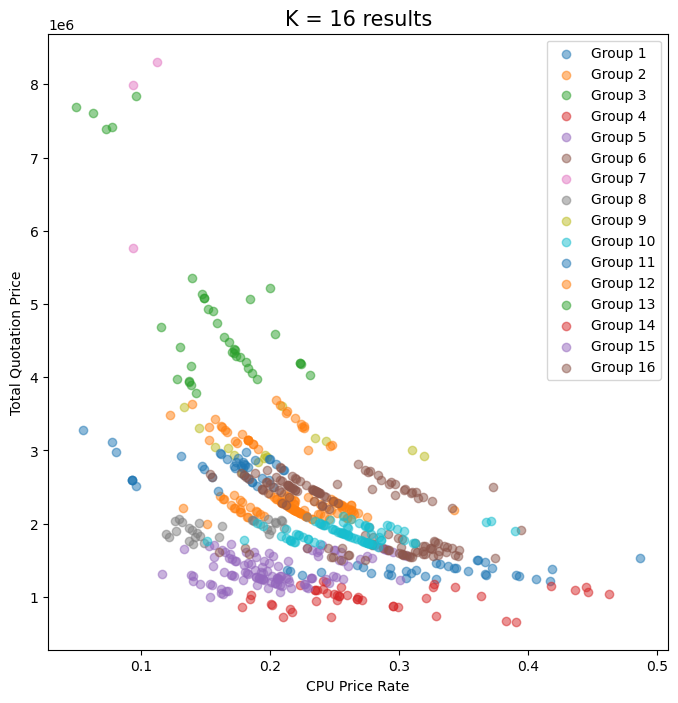

In [32]:
plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(price_rate[res_r == i, 0], pdata[res_r == i, 3] * (maxt - mint) + mint, alpha=0.5, label=f'Group {i+1}')

plt.title('K = %d results'%k , size = 15)
plt.legend()
plt.xlabel('CPU Price Rate')
plt.ylabel('Total Quotation Price')
plt.show()

In [33]:
for i in range(k):
    total_avg = np.average(np.array(prices['total'])[res_r == i])
    print(f'Group{i+1} Average Total Price: {total_avg:.0f}')

Group1 Average Total Price: 1360082
Group2 Average Total Price: 2214925
Group3 Average Total Price: 4437877
Group4 Average Total Price: 1061959
Group5 Average Total Price: 1570989
Group6 Average Total Price: 1646443
Group7 Average Total Price: 7353720
Group8 Average Total Price: 1940085
Group9 Average Total Price: 3069213
Group10 Average Total Price: 1859550
Group11 Average Total Price: 2766664
Group12 Average Total Price: 3279410
Group13 Average Total Price: 7591699
Group14 Average Total Price: 800235
Group15 Average Total Price: 1223943
Group16 Average Total Price: 2498868


In [34]:
for i in range(k):
    cpu_bench = 0
    for cseq in np.array(pseqs['cpu'])[res_r == i]:
        cpu_bench += cpu_df.loc[cpu_df['product_seq'] == cseq, 'bench_mark'].iloc[0]
    group_len = len(np.array(pseqs['cpu'])[res_r == i])
    print(f'Group{i+1} Average Bench: {cpu_bench/group_len:.0f}')

Group1 Average Bench: 39910
Group2 Average Bench: 40604
Group3 Average Bench: 55675
Group4 Average Bench: 29136
Group5 Average Bench: 31964
Group6 Average Bench: 42088
Group7 Average Bench: 56177
Group8 Average Bench: 32741
Group9 Average Bench: 47569
Group10 Average Bench: 41574
Group11 Average Bench: 37916
Group12 Average Bench: 48538
Group13 Average Bench: 43963
Group14 Average Bench: 22959
Group15 Average Bench: 25751
Group16 Average Bench: 45815


In [35]:
lst = []
for i in range(k):
    cpu_price = 0
    for cseq in np.array(pseqs['cpu'])[res_r == i]:
        cpu_price += cpu_df.loc[cpu_df['product_seq'] == cseq, 'price'].iloc[0]
    group_len = len(np.array(pseqs['cpu'])[res_r == i])
    lst.append(cpu_price/group_len)
    print(f'Group{i+1} Average Price: {cpu_price/group_len:.0f}')

Group1 Average Price: 449431
Group2 Average Price: 491161
Group3 Average Price: 744364
Group4 Average Price: 308000
Group5 Average Price: 344762
Group6 Average Price: 493365
Group7 Average Price: 740487
Group8 Average Price: 340706
Group9 Average Price: 621431
Group10 Average Price: 482226
Group11 Average Price: 448270
Group12 Average Price: 622063
Group13 Average Price: 546360
Group14 Average Price: 209929
Group15 Average Price: 240435
Group16 Average Price: 592163


In [36]:
for i in range(k):
    cpu_rate = np.average(price_rate[res_r == i, 0]) * 100
    gpu_rate = np.average(price_rate[res_r == i, 1]) * 100
    ram_rate = np.average(price_rate[res_r == i, 2]) * 100
    print(f'Group{i+1:2d} Average Rate: {cpu_rate:2.0f}%: {gpu_rate:2.0f}%: {ram_rate:1.0f}%: {np.sum([cpu_rate, gpu_rate, ram_rate]):2.0f}%')

Group 1 Average Rate: 33%: 34%: 4%: 71%
Group 2 Average Rate: 22%: 51%: 4%: 78%
Group 3 Average Rate: 17%: 56%: 3%: 76%
Group 4 Average Rate: 29%: 36%: 5%: 70%
Group 5 Average Rate: 22%: 49%: 4%: 75%
Group 6 Average Rate: 30%: 35%: 6%: 70%
Group 7 Average Rate: 10%: 28%: 1%: 39%
Group 8 Average Rate: 17%: 60%: 3%: 81%
Group 9 Average Rate: 20%: 36%: 4%: 61%
Group10 Average Rate: 26%: 44%: 4%: 74%
Group11 Average Rate: 16%: 62%: 2%: 81%
Group12 Average Rate: 19%: 54%: 4%: 77%
Group13 Average Rate:  7%: 83%: 2%: 92%
Group14 Average Rate: 27%: 41%: 6%: 73%
Group15 Average Rate: 20%: 51%: 4%: 75%
Group16 Average Rate: 24%: 44%: 5%: 72%


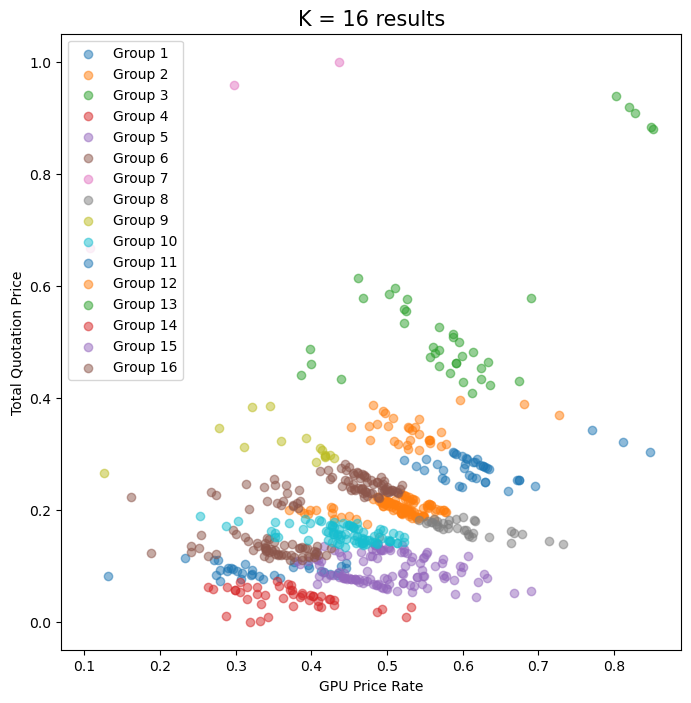

In [37]:
plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(price_rate[res_r == i, 1], pdata[res_r == i, 3], alpha=0.5, label=f'Group {i+1}')

plt.title('K = %d results'%k , size = 15)
plt.legend()
plt.xlabel('GPU Price Rate')
plt.ylabel('Total Quotation Price')
plt.show()

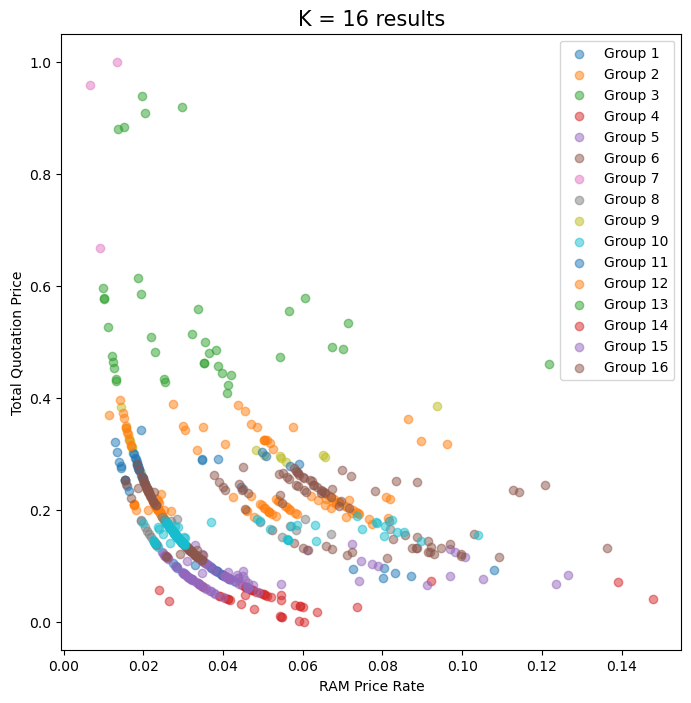

In [38]:
plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(price_rate[res_r == i, 2], pdata[res_r == i, 3], alpha=0.5, label=f'Group {i+1}')

plt.title('K = %d results'%k , size = 15)
plt.legend()
plt.xlabel('RAM Price Rate')
plt.ylabel('Total Quotation Price')
plt.show()

# 뚜

In [89]:
bdata = np.array(pd.DataFrame(bench_rr))

In [90]:
bdata

array([[0.27222218, 0.54496674, 0.18281108, 0.9192716 ],
       [0.35896017, 0.5249914 , 0.11604843, 0.66485724],
       [0.30823763, 0.61068437, 0.08107799, 0.82171727],
       ...,
       [0.34155597, 0.52353194, 0.13491208, 0.71798713],
       [0.33609368, 0.5860932 , 0.07781313, 0.79493748],
       [0.45078159, 0.40348498, 0.14573343, 0.75123023]])

In [91]:
k = 16
model_b = KMeans(n_clusters=k, n_init='auto')

In [92]:
model_b.fit(bdata)

C:\Users\SSAFY\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=16, n_init='auto')

In [93]:
res_b = model_b.predict(bdata)

In [117]:
k = [1]

In [118]:
if not k: print(1)

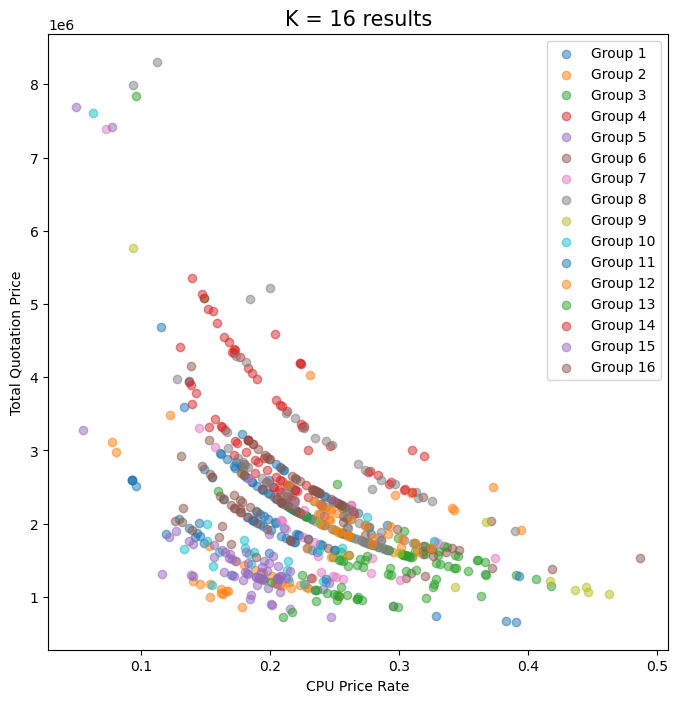

In [94]:
plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(price_rate[res_b == i, 0], pdata[res_b == i, 3] * (maxt - mint) + mint, alpha=0.5, label=f'Group {i+1}')

plt.title('K = %d results'%k , size = 15)
plt.legend()
plt.xlabel('CPU Price Rate')
plt.ylabel('Total Quotation Price')
plt.show()

In [96]:
for i in range(k):
    total_avg = np.average(np.array(prices['total'])[res_b == i])
    print(f'Group{i+1} Average Total Price: {total_avg:.0f}')

Group1 Average Total Price: 2279657
Group2 Average Total Price: 1381071
Group3 Average Total Price: 1750580
Group4 Average Total Price: 3139740
Group5 Average Total Price: 1190700
Group6 Average Total Price: 1705932
Group7 Average Total Price: 2120686
Group8 Average Total Price: 2500190
Group9 Average Total Price: 1888068
Group10 Average Total Price: 1803407
Group11 Average Total Price: 919492
Group12 Average Total Price: 2045390
Group13 Average Total Price: 1125865
Group14 Average Total Price: 3820324
Group15 Average Total Price: 1642248
Group16 Average Total Price: 2395092


In [97]:
for i in range(k):
    cpu_bench = 0
    for cseq in np.array(pseqs['cpu'])[res_b == i]:
        cpu_bench += cpu_df.loc[cpu_df['product_seq'] == cseq, 'bench_mark'].iloc[0]
    group_len = len(np.array(pseqs['cpu'])[res_b == i])
    print(f'Group{i+1} Average Bench: {cpu_bench/group_len:.0f}')

Group1 Average Bench: 37131
Group2 Average Bench: 25072
Group3 Average Bench: 42168
Group4 Average Bench: 52477
Group5 Average Bench: 20905
Group6 Average Bench: 46850
Group7 Average Bench: 36030
Group8 Average Bench: 47168
Group9 Average Bench: 42623
Group10 Average Bench: 29038
Group11 Average Bench: 29982
Group12 Average Bench: 47483
Group13 Average Bench: 27512
Group14 Average Bench: 51758
Group15 Average Bench: 27212
Group16 Average Bench: 36066


In [98]:
lst = []
for i in range(k):
    cpu_price = 0
    for cseq in np.array(pseqs['cpu'])[res_b == i]:
        cpu_price += cpu_df.loc[cpu_df['product_seq'] == cseq, 'price'].iloc[0]
    group_len = len(np.array(pseqs['cpu'])[res_b == i])
    lst.append(cpu_price/group_len)
    print(f'Group{i+1} Average Price: {cpu_price/group_len:.0f}')

Group1 Average Price: 449351
Group2 Average Price: 242632
Group3 Average Price: 487060
Group4 Average Price: 636939
Group5 Average Price: 201048
Group6 Average Price: 537163
Group7 Average Price: 466180
Group8 Average Price: 574245
Group9 Average Price: 505473
Group10 Average Price: 318761
Group11 Average Price: 313354
Group12 Average Price: 559298
Group13 Average Price: 284950
Group14 Average Price: 686838
Group15 Average Price: 264138
Group16 Average Price: 463174


In [101]:
crate = []
grate = []
rrate = []
for i in range(k):
    cpu_rate = np.average(price_rate[res_b == i, 0]) * 100
    gpu_rate = np.average(price_rate[res_b == i, 1]) * 100
    ram_rate = np.average(price_rate[res_b == i, 2]) * 100
    crate.append(cpu_rate)
    grate.append(gpu_rate)
    rrate.append(ram_rate)
    total_avg = np.average(np.array(prices['total'])[res_b == i])
    print(f'Group{i+1:2d} Average Rate: {cpu_rate:2.0f}%: {gpu_rate:2.0f}%: {ram_rate:1.0f}%: {np.sum([cpu_rate, gpu_rate, ram_rate]):2.0f}%: {total_avg:>7.0f}')

Group 1 Average Rate: 20%: 54%: 3%: 77%: 2279657
Group 2 Average Rate: 19%: 53%: 4%: 75%: 1381071
Group 3 Average Rate: 30%: 40%: 3%: 73%: 1750580
Group 4 Average Rate: 21%: 52%: 5%: 77%: 3139740
Group 5 Average Rate: 20%: 43%: 5%: 68%: 1190700
Group 6 Average Rate: 32%: 31%: 8%: 70%: 1705932
Group 7 Average Rate: 24%: 46%: 3%: 73%: 2120686
Group 8 Average Rate: 25%: 48%: 2%: 75%: 2500190
Group 9 Average Rate: 34%: 26%: 4%: 64%: 1888068
Group10 Average Rate: 20%: 43%: 9%: 72%: 1803407
Group11 Average Rate: 35%: 31%: 5%: 71%:  919492
Group12 Average Rate: 27%: 38%: 7%: 72%: 2045390
Group13 Average Rate: 26%: 42%: 4%: 72%: 1125865
Group14 Average Rate: 19%: 45%: 9%: 73%: 3820324
Group15 Average Rate: 18%: 53%: 4%: 75%: 1642248
Group16 Average Rate: 19%: 51%: 6%: 77%: 2395092


In [102]:
grouped = np.array([crate, grate, rrate]).T

In [103]:
grouped[5, 0]

32.00347568370584

# 모델 저장

In [104]:
import pickle

In [105]:
pickle.dump(model_b, open("rate_by_bench.pkl", "wb"))

In [106]:
pickle.dump(grouped, open("rate_group.pkl", "wb"))

In [107]:
load_model = pickle.load(open("rate_by_bench.pkl", "rb"))

In [108]:
load_group = pickle.load(open("rate_group.pkl", "rb"))

In [109]:
lres = load_model.predict(bdata)

In [110]:
crate = []
grate = []
rrate = []
for i in range(k):
    cpu_rate = np.average(price_rate[lres == i, 0]) * 100
    gpu_rate = np.average(price_rate[lres == i, 1]) * 100
    ram_rate = np.average(price_rate[lres == i, 2]) * 100
    crate.append(cpu_rate)
    grate.append(gpu_rate)
    rrate.append(ram_rate)
    total_avg = np.average(np.array(prices['total'])[lres == i])
    print(f'Group{i:2d} Average Rate: {cpu_rate:2.0f}%: {gpu_rate:2.0f}%: {ram_rate:1.0f}%: {np.sum([cpu_rate, gpu_rate, ram_rate]):2.0f}%: {total_avg:>7.0f}')

Group 0 Average Rate: 20%: 54%: 3%: 77%: 2279657
Group 1 Average Rate: 19%: 53%: 4%: 75%: 1381071
Group 2 Average Rate: 30%: 40%: 3%: 73%: 1750580
Group 3 Average Rate: 21%: 52%: 5%: 77%: 3139740
Group 4 Average Rate: 20%: 43%: 5%: 68%: 1190700
Group 5 Average Rate: 32%: 31%: 8%: 70%: 1705932
Group 6 Average Rate: 24%: 46%: 3%: 73%: 2120686
Group 7 Average Rate: 25%: 48%: 2%: 75%: 2500190
Group 8 Average Rate: 34%: 26%: 4%: 64%: 1888068
Group 9 Average Rate: 20%: 43%: 9%: 72%: 1803407
Group10 Average Rate: 35%: 31%: 5%: 71%:  919492
Group11 Average Rate: 27%: 38%: 7%: 72%: 2045390
Group12 Average Rate: 26%: 42%: 4%: 72%: 1125865
Group13 Average Rate: 19%: 45%: 9%: 73%: 3820324
Group14 Average Rate: 18%: 53%: 4%: 75%: 1642248
Group15 Average Rate: 19%: 51%: 6%: 77%: 2395092


In [61]:
import time

In [67]:
time.localtime().tm_year

2023